<a href="https://colab.research.google.com/github/BagusDAriAwan/creditcard-fraud/blob/master/percobaan1_PAYSIM_fitur_terbaik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import collections
import time
from scipy import stats

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.externals.six import StringIO  
import pydotplus

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
from sklearn.model_selection import train_test_split, learning_curve

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


In [0]:
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1;
        else:
            y[i]=0
    return y

In [0]:
from sklearn.ensemble import IsolationForest
def iForest(X, ntree, sample, th):
    ifor = IsolationForest(n_estimators=ntree, max_samples=sample, contamination=th, random_state=1)
#     ifor = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0039, max_features=1.0, random_state=42, verbose=0)
    ifor.fit(X)
    return ifor

In [0]:
def model_evaluate(ifor,X,y):
    ts = time.time()
    y_pred=ifor.predict(X)
    tf = time.time()
    print('time : ', tf-ts)
    y_pred=convert(y_pred)
    
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    print('accuracy : ',accuracy)
    print('sensitivity : ',sensitivity)
    print('specifity : ', specifity)
    print('precision : ',precision)
    print('recall : ',recall)
    print('f1 score : ',f1_score)
    print('Confusion matrix')
    TP,FP,FN,TN = confussion_matrik(y,y_pred)
    print('TP = ',TP,'FP = ',FP,'FN = ',FN,'TN = ',TN)
    df_cm = pd.DataFrame([[TN,FP],[FN,TP]],
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sb.set(font_scale=1.4)#for label size
    sb.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [0]:
def eval_model(ifor,X,y):
#     ts = time.time()
    y_pred=ifor.predict(X)
#     tf = time.time()
    y_pred=convert(y_pred)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    return accuracy,sensitivity,specifity,precision,recall,f1_score

## ---------

In [0]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/paysim/paysimdata.csv")
df['Class'] = df['isFraud']
df = df.drop(['isFraud'], axis=1)

In [19]:
df.shape

(6362620, 11)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud    int64
Class             int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [21]:
df['Class'].value_counts()

0    6354407
1       8213
Name: Class, dtype: int64

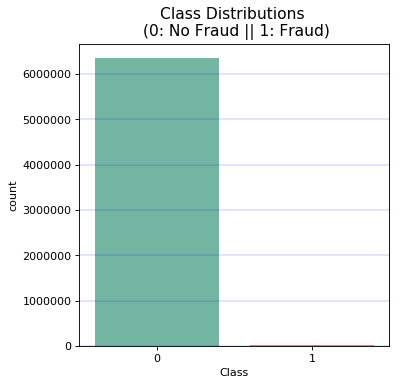

In [22]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sb.countplot('Class', data=df,palette='Set2')


In [23]:
count = 0
for a in df.columns:
    if df[a].isnull().sum() > 0 :
        print(a)
        count+=1
count

0

In [24]:
len(df.columns)

11

In [25]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,Class
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [0]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig',
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [27]:
df.isnull().values.any()

False

----------------------------------

2.1. Which types of transactions are fraudulent?
We find that of the five types of transactions, fraud occurs only in two of them (see also kernels by Net, Philipp Schmidt and Ibe_Noriaki): 'TRANSFER' where money is sent to a customer / fraudster and 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash. Remarkably, the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs (see the right half of the plot in section 5.1). These observations appear, at first, to bear out the description provided on Kaggle for the modus operandi of fraudulent transactions in this dataset, namely, fraud is committed by first transferring out funds to another account which subsequently cashes it out. We will return to this issue later in section 2.4

In [0]:
# print('\n The types of fraudulent transactions are {}'.format(\
# list(df.loc[df.Class == 1].type.drop_duplicates().values))) # only 'CASH_OUT' 
#                                                              # & 'TRANSFER'

# dfFraudTransfer = df.loc[(df.Class == 1) & (df.type == 'TRANSFER')]
# dfFraudCashout = df.loc[(df.Class == 1) & (df.type == 'CASH_OUT')]

# print ('\n The number of fraudulent TRANSFERs = {}'.\
#        format(len(dfFraudTransfer))) # 4097

# print ('\n The number of fraudulent CASH_OUTs = {}'.\
#        format(len(dfFraudCashout))) # 4116

In [29]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [30]:
df['Class'].value_counts()

0    6354407
1       8213
Name: Class, dtype: int64

From the exploratory data analysis (EDA) of section 2, we know that fraud only occurs in 'TRANSFER's and 'CASH_OUT's. So we assemble only the corresponding data in X for analysis

In [31]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)

#X = X.loc[np.random.choice(X.index, 100000, replace = False)]

Y = X['Class']
del X['Class']

# Eliminate columns shown to be irrelevant for analysis in the EDA
# X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


The data has several transactions with zero balances in the destination account both before and after a non-zero amount is transacted. The fraction of such transactions, where zero likely denotes a missing value, is much larger in fraudulent (50%) compared to genuine transactions (0.06%).

In [32]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldBalanceDest == 0) & \
(Xfraud.newBalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldBalanceDest == 0) & \
(XnonFraud.newBalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


Since the destination account balances being zero is a strong indicator of fraud, we do not impute the account balance (before the transaction is made) with a statistic or from a distribution with a subsequent adjustment for the amount transacted. Doing so would mask this indicator of fraud and make fraudulent transactions appear genuine. Instead, below we replace the value of 0 with -1 which will be more useful to a suitable machine-learning (ML) algorithm detecting fraud.

In [33]:
X.loc[(X.oldBalanceDest == 0) & (X.newBalanceDest == 0) & (X.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
X.loc[(X.oldBalanceOrig == 0) & (X.newBalanceOrig == 0) & (X.amount != 0), \
      ['oldBalanceOrig', 'newBalanceOrig']] = -1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
X['errorBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['errorBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
df = X.copy()
df['Class'] = Y.copy()

In [37]:
df['Class'].value_counts()

0    2762196
1       8213
Name: Class, dtype: int64

In [38]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'errorBalanceOrig', 'errorBalanceDest', 'Class'],
      dtype='object')

In [0]:
df_ = df.copy()

In [40]:
df_.tail()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,Class
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,0,0.0,0.000000e+00,1
6362616,743,0,6311409.28,C1529008245,6311409.28,0.0,C1881841831,-1.00,-1.00,0,0.0,6.311409e+06,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,0,0.0,1.000000e-02,1
6362618,743,0,850002.52,C1685995037,850002.52,0.0,C2080388513,-1.00,-1.00,0,0.0,8.500025e+05,1
6362619,743,1,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,0,0.0,9.313226e-10,1


In [0]:
# df['type'].unique()

In [0]:
a = {}
i = 1
for m in df_['type'].unique():
  if m not in a :
    a[m] = i
    i +=1
    
df_['type'] = df_['type'].map(a)
# a

In [0]:
a = {}
i = 1
for m in df_['nameOrig'].unique():
  if m not in a :
    a[m] = i
    i +=1
    
df_['nameOrig'] = df_['nameOrig'].map(a)

In [0]:
a = {}
i = 1
for m in df_['nameDest'].unique():
  if m not in a :
    a[m] = i
    i +=1
    
df_['nameDest'] = df_['nameDest'].map(a)

In [45]:
df_.tail()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,Class
6362615,743,2,339682.13,2768626,339682.13,0.0,509563,0.00,339682.13,0,0.0,0.000000e+00,1
6362616,743,1,6311409.28,2768627,6311409.28,0.0,509564,-1.00,-1.00,0,0.0,6.311409e+06,1
6362617,743,2,6311409.28,2768628,6311409.28,0.0,204812,68488.84,6379898.11,0,0.0,1.000000e-02,1
6362618,743,1,850002.52,2768629,850002.52,0.0,509565,-1.00,-1.00,0,0.0,8.500025e+05,1
6362619,743,2,850002.52,2768630,850002.52,0.0,52618,6510099.11,7360101.63,0,0.0,9.313226e-10,1


In [0]:
# # Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# # df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# # df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df['scaled_amount'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = minmax_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

# scaled_amount = df['scaled_amount']
# scaled_time = df['scaled_time']

# df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
# df.insert(0, 'scaled_amount', scaled_amount)
# df.insert(1, 'scaled_time', scaled_time)

# # Amount and Time are Scaled!

# df.head()

In [0]:
X = df_.drop(['Class'], axis=1)
y = df_['Class'].copy()

In [0]:
# X_new = df_new.drop('Class', axis=1)
# y_new = df_new['Class'].copy()

In [0]:
# y_new.value_counts()

In [0]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# X_neww = minmax_scaler.fit_transform(X_new)
# X_new = pd.DataFrame(X_neww, columns=X_new.columns)
# X_new.tail()

In [51]:
X.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'errorBalanceOrig', 'errorBalanceDest'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=1, stratify=y_train)


In [54]:
X_train.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
5520643,380,2,131499.46,2413154,-1.0,-1.0,2300,7552658.53,7684158.00,0,131499.46,-1.000000e-02
1732672,161,1,166186.31,762018,-1.0,-1.0,108042,951079.01,1117265.32,0,166186.31,0.000000e+00
6040663,487,2,111000.58,2634954,-1.0,-1.0,14413,1604936.10,1715936.68,0,111000.58,2.328306e-10
3042360,234,2,144557.75,1335060,49580.0,0.0,10947,260817.97,405375.72,0,94977.75,0.000000e+00
2533668,205,2,194584.08,1112424,26536.0,0.0,204396,505059.00,495973.84,0,168048.08,2.036692e+05


In [0]:
y_test0 = np.array(y_test)
y_train0=np.array(y_train)
y_val0 = np.array(y_val)

In [56]:
print(len(X_train),len(X_val),len(X_test))

2216354 277014 277041


In [57]:
ytrain_ab = y_train[y_train==1]
yval_ab = y_val[y_val==1]
ytest_ab = y_test[y_test==1]
print('fraud train =',len(ytrain_ab),'fraud val =',len(yval_ab),'fraud test =',len(ytest_ab))

fraud train = 6571 fraud val = 821 fraud test = 821


In [58]:
th_train=len(ytrain_ab)/len(y_train)
th_test=len(ytest_ab)/len(y_test)
th_val=len(yval_ab)/len(y_val)
print('threshold train =',th_train, 'threshold test =', th_test,'threshold val =', th_val)

threshold train = 0.002964779092148637 threshold test = 0.002963460282052115 threshold val = 0.002963749124592981


In [59]:
nTree= 100
sample = 256
ifo = iForest(X_train, nTree, sample, th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  8.500968933105469
accuracy :  0.994455153891139
sensitivity :  0.05968331303288672
specifity :  0.9972338183806252
precision :  0.06027060270602706
recall :  0.05968331303288672
f1 score :  0.05997552019583843
Confusion matrix
TP =  49 FP =  764 FN =  772 TN =  275429


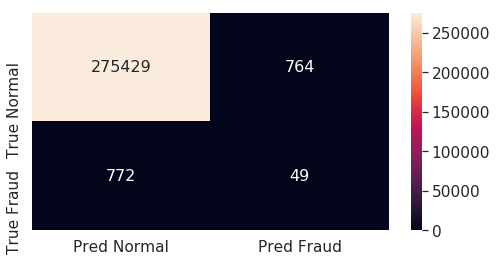

In [60]:
model_evaluate(ifo,X_val,y_val0)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  8.49535083770752
accuracy :  0.9945531527824402
sensitivity :  0.06090133982947625
specifity :  0.997328216638911
precision :  0.06345177664974619
recall :  0.06090133982947625
f1 score :  0.062150403977625855
Confusion matrix
TP =  50 FP =  738 FN =  771 TN =  275482


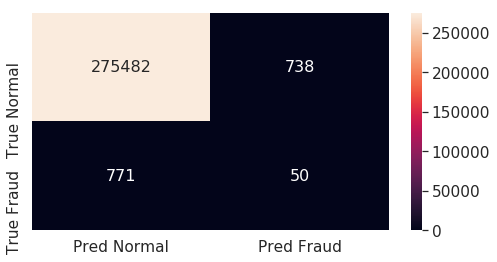

In [61]:
model_evaluate(ifo, X_test, y_test0)

### percobaan1.1- 3 fitur terbaik

In [62]:
X1 = X[['errorBalanceOrig','oldBalanceOrig','newBalanceDest']]
X1.head()

,errorBalanceOrig,oldBalanceOrig,newBalanceDest
2,0.00,181.0,-1.00
3,0.00,181.0,0.00
15,213808.94,15325.0,51513.44
19,214605.30,705.0,0.00
24,300850.89,10835.0,2719172.89


In [63]:
y.value_counts()

0    2762196
1       8213
Name: Class, dtype: int64

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=1, stratify=y)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=1, stratify=y1_train)

In [66]:
X1_train.head()

,errorBalanceOrig,oldBalanceOrig,newBalanceDest
729820,6137.67,114335.0,170639.67
2902152,190839.24,-1.0,722675.61
1722900,187165.36,-1.0,416543.45
4751057,160829.23,-1.0,2135999.53
3262058,120123.80,-1.0,583842.22


In [67]:
print(len(X1_train),len(X1_val),len(X1_test))

1662245 554082 554082


In [68]:
y1train_ab = y1_train[y1_train==1]
y1val_ab = y1_val[y1_val==1]
y1test_ab = y1_test[y1_test==1]
print('fraud train =',len(y1train_ab),'fraud val =',len(y1val_ab),'fraud test =',len(ytest_ab))

fraud train = 4927 fraud val = 1643 fraud test = 821


In [0]:
y_test1 = np.array(y1_test)
y_train1=np.array(y1_train)
y_val1 = np.array(y1_val)

In [70]:
th_train1=len(y1train_ab)/len(y1_train)
th_test1=len(y1test_ab)/len(y1_test)
th_val1=len(y1val_ab)/len(y1_val)
print('threshold train =',th_train1, 'threshold test =', th_test1,'threshold val =', th_val1)

threshold train = 0.002964063660892347 threshold test = 0.002965265069069199 threshold val = 0.002965265069069199


In [71]:
ifo1 = iForest(X1_train, 100, 256, th_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  14.667823791503906
accuracy :  0.9940821033709812
sensitivity :  0.006695069993913573
specifity :  0.997018675365063
precision :  0.0066344993968636915
recall :  0.006695069993913573
f1 score :  0.006664647076643442
Confusion matrix
TP =  11 FP =  1647 FN =  1632 TN =  550792


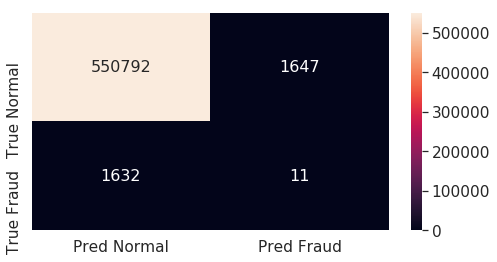

In [72]:
model_evaluate(ifo1,X1_val,y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  14.699686288833618
accuracy :  0.9943058969610996
sensitivity :  0.0036518563603164943
specifity :  0.9972521853091473
precision :  0.003937007874015748
recall :  0.0036518563603164943
f1 score :  0.003789074834227976
Confusion matrix
TP =  6 FP =  1518 FN =  1637 TN =  550921


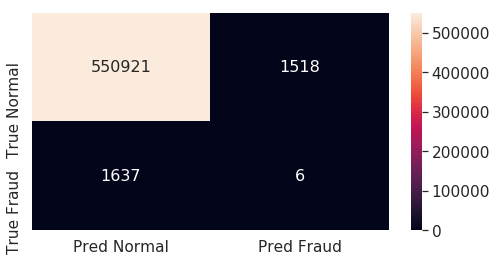

In [73]:
model_evaluate(ifo1, X1_test, y_test1)

### percobaan1.2 - 5 fitur terbaik

In [74]:
X2 = X[['errorBalanceOrig','oldBalanceOrig','newBalanceDest','newBalanceOrig','oldBalanceDest']]
X2.head()

,errorBalanceOrig,oldBalanceOrig,newBalanceDest,newBalanceOrig,oldBalanceDest
2,0.00,181.0,-1.00,0.0,-1.0
3,0.00,181.0,0.00,0.0,21182.0
15,213808.94,15325.0,51513.44,0.0,5083.0
19,214605.30,705.0,0.00,0.0,22425.0
24,300850.89,10835.0,2719172.89,0.0,6267.0


In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=1, stratify=y)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=1, stratify=y2_train)

In [76]:
print(len(X2_train),len(X2_val),len(X2_test))

1662245 554082 554082


In [0]:
y2train_ab = y2_train[y2_train==1]
y2val_ab = y2_val[y2_val==1]
y2test_ab = y2_test[y2_test==1]

In [0]:
y_test2 = np.array(y2_test)
y_train2=np.array(y2_train)
y_val2 = np.array(y2_val)

In [79]:
th_train2=len(y2train_ab)/len(y2_train)
th_test2=len(y2test_ab)/len(y2_test)
th_val2=len(y2val_ab)/len(y2_val)
print('threshold train =',th_train2, 'threshold test =', th_test2,'threshold val =', th_val2)

threshold train = 0.002964063660892347 threshold test = 0.002965265069069199 threshold val = 0.002965265069069199


In [80]:
ifo2 = iForest(X2_train, 100, 256, th_train2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  14.849754810333252
accuracy :  0.9941326374074595
sensitivity :  0.023128423615337797
specifity :  0.9970204855196683
precision :  0.022565320665083134
recall :  0.023128423615337797
f1 score :  0.0228434024646829
Confusion matrix
TP =  38 FP =  1646 FN =  1605 TN =  550793


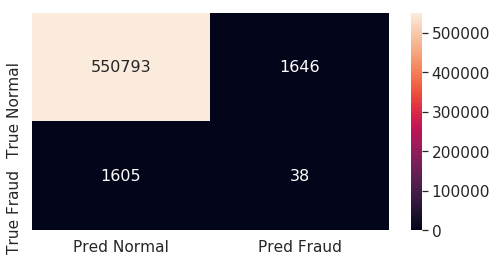

In [81]:
model_evaluate(ifo2,X2_val,y_val2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  14.911176204681396
accuracy :  0.9942048288881429
sensitivity :  0.019476567255021303
specifity :  0.9971037526315123
precision :  0.0196078431372549
recall :  0.019476567255021303
f1 score :  0.019541984732824428
Confusion matrix
TP =  32 FP =  1600 FN =  1611 TN =  550839


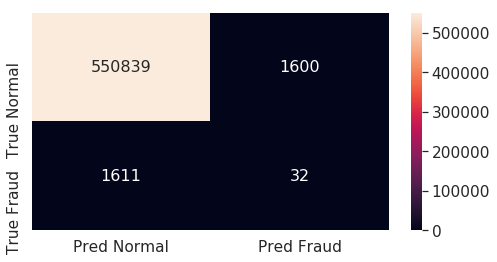

In [82]:
model_evaluate(ifo2, X2_test, y_test2)

### percobaan1.3 - 7 fitur terbaik

In [110]:
X3 = X[['errorBalanceOrig','oldBalanceOrig','newBalanceDest','newBalanceOrig','oldBalanceDest','amount','step']]
X3.head()

,errorBalanceOrig,oldBalanceOrig,newBalanceDest,newBalanceOrig,oldBalanceDest,amount,step
2,0.00,181.0,-1.00,0.0,-1.0,181.00,1
3,0.00,181.0,0.00,0.0,21182.0,181.00,1
15,213808.94,15325.0,51513.44,0.0,5083.0,229133.94,1
19,214605.30,705.0,0.00,0.0,22425.0,215310.30,1
24,300850.89,10835.0,2719172.89,0.0,6267.0,311685.89,1


In [0]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=1, stratify=y)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=1, stratify=y3_train)

In [112]:
print(len(X3_train),len(X3_val),len(X3_test))

1662245 554082 554082


In [0]:
y3train_ab = y3_train[y3_train==1]
y3val_ab = y3_val[y3_val==1]
y3test_ab = y3_test[y3_test==1]

In [0]:
y_test3 = np.array(y3_test)
y_train3=np.array(y3_train)
y_val3 = np.array(y3_val)

In [115]:
th_train3=len(y3train_ab)/len(y3_train)
th_test3=len(y3test_ab)/len(y3_test)
th_val3=len(y3val_ab)/len(y3_val)
print('threshold train =',th_train3, 'threshold test =', th_test3,'threshold val =', th_val3)

threshold train = 0.002964063660892347 threshold test = 0.002965265069069199 threshold val = 0.002965265069069199


In [116]:
ifo3 = iForest(X3_train, 100, 256, th_train3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  15.98757028579712
accuracy :  0.9944845708757909
sensitivity :  0.06634205721241632
specifity :  0.997244944690726
precision :  0.0668301655426119
recall :  0.06634205721241632
f1 score :  0.06658521686010996
Confusion matrix
TP =  109 FP =  1522 FN =  1534 TN =  550917


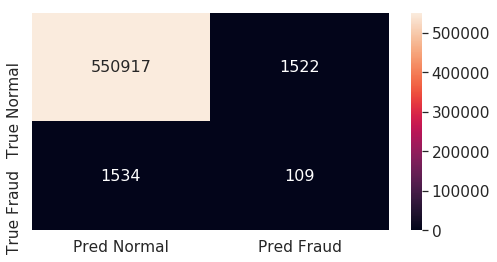

In [117]:
model_evaluate(ifo3,X3_val,y_val3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  16.14934730529785
accuracy :  0.9946091011799697
sensitivity :  0.06938527084601338
specifity :  0.9973607945854656
precision :  0.07251908396946564
recall :  0.06938527084601338
f1 score :  0.07091757387247277
Confusion matrix
TP =  114 FP =  1458 FN =  1529 TN =  550981


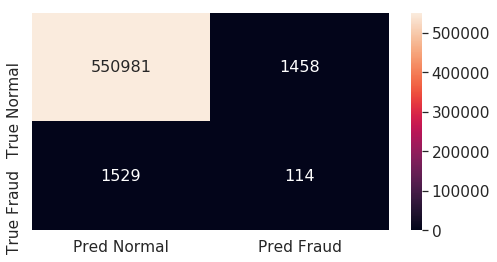

In [118]:
model_evaluate(ifo3, X3_test, y_test3)

### percobaan1.4 - 10 fitur terbaik

In [92]:
X4 = X[['errorBalanceOrig','oldBalanceOrig','newBalanceDest','newBalanceOrig','oldBalanceDest','amount','step','nameOrig','type','errorBalanceDest']]
X4.head()

,errorBalanceOrig,oldBalanceOrig,newBalanceDest,newBalanceOrig,oldBalanceDest,amount,step,nameOrig,type,errorBalanceDest
2,0.00,181.0,-1.00,0.0,-1.0,181.00,1,1,1,181.0
3,0.00,181.0,0.00,0.0,21182.0,181.00,1,2,2,21363.0
15,213808.94,15325.0,51513.44,0.0,5083.0,229133.94,1,3,2,182703.5
19,214605.30,705.0,0.00,0.0,22425.0,215310.30,1,4,1,237735.3
24,300850.89,10835.0,2719172.89,0.0,6267.0,311685.89,1,5,1,-2401220.0


In [0]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=1, stratify=y)
X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train, y4_train, test_size=0.25, random_state=1, stratify=y4_train)

In [94]:
print(len(X4_train),len(X4_val),len(X4_test))

1662245 554082 554082


In [0]:
y4train_ab = y4_train[y4_train==1]
y4val_ab = y4_val[y4_val==1]
y4test_ab = y4_test[y4_test==1]

In [0]:
y_test4 = np.array(y4_test)
y_train4=np.array(y4_train)
y_val4 = np.array(y4_val)

In [97]:
th_train4=len(y4train_ab)/len(y4_train)
th_test4=len(y4test_ab)/len(y4_test)
th_val4=len(y4val_ab)/len(y4_val)
print('threshold train =',th_train4, 'threshold test =', th_test4,'threshold val =', th_val4)

threshold train = 0.002964063660892347 threshold test = 0.002965265069069199 threshold val = 0.002965265069069199


In [98]:
ifo4 = iForest(X4_train, 100, 256, th_train4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  17.02557897567749
accuracy :  0.9941940001660404
sensitivity :  0.02251978088861838
specifity :  0.9970838409308539
precision :  0.022451456310679612
recall :  0.02251978088861838
f1 score :  0.022485566697052567
Confusion matrix
TP =  37 FP =  1611 FN =  1606 TN =  550828


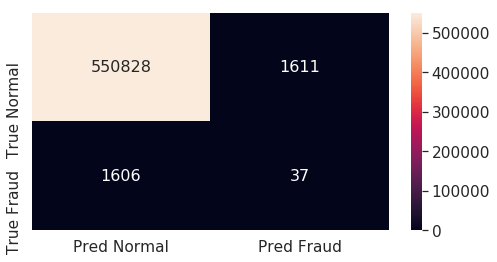

In [99]:
model_evaluate(ifo4,X4_val,y_val4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  17.006256341934204
accuracy :  0.9943835028028343
sensitivity :  0.023128423615337797
specifity :  0.9972720970098056
precision :  0.02459546925566343
recall :  0.023128423615337797
f1 score :  0.023839397741530738
Confusion matrix
TP =  38 FP =  1507 FN =  1605 TN =  550932


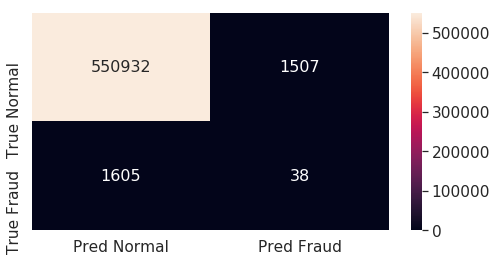

In [100]:
model_evaluate(ifo4, X4_test, y_test4)

### percobaan1.5 - 6 fitur terbaik

In [119]:
X5 = X[['errorBalanceOrig','oldBalanceOrig','newBalanceDest','newBalanceOrig','oldBalanceDest','amount']]
X5.head()

,errorBalanceOrig,oldBalanceOrig,newBalanceDest,newBalanceOrig,oldBalanceDest,amount
2,0.00,181.0,-1.00,0.0,-1.0,181.00
3,0.00,181.0,0.00,0.0,21182.0,181.00
15,213808.94,15325.0,51513.44,0.0,5083.0,229133.94
19,214605.30,705.0,0.00,0.0,22425.0,215310.30
24,300850.89,10835.0,2719172.89,0.0,6267.0,311685.89


In [0]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, random_state=1, stratify=y)
X5_train, X5_val, y5_train, y5_val = train_test_split(X5_train, y5_train, test_size=0.25, random_state=1, stratify=y5_train)

In [121]:
print(len(X5_train),len(X5_val),len(X5_test))

1662245 554082 554082


In [0]:
y5train_ab = y5_train[y5_train==1]
y5val_ab = y5_val[y5_val==1]
y5test_ab = y5_test[y5_test==1]

In [0]:
y_test5 = np.array(y5_test)
y_train5=np.array(y5_train)
y_val5 = np.array(y5_val)

In [124]:
th_train5=len(y5train_ab)/len(y5_train)
th_test5=len(y5test_ab)/len(y5_test)
th_val5=len(y5val_ab)/len(y5_val)
print('threshold train =',th_train5, 'threshold test =', th_test5,'threshold val =', th_val5)

threshold train = 0.002964063660892347 threshold test = 0.002965265069069199 threshold val = 0.002965265069069199


In [125]:
ifo5 = iForest(X5_train, 100, 256, th_train5)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  15.418761491775513
accuracy :  0.9941669283607841
sensitivity :  0.02130249543517955
specifity :  0.997060308920985
precision :  0.02109704641350211
recall :  0.02130249543517955
f1 score :  0.021199273167777102
Confusion matrix
TP =  35 FP =  1624 FN =  1608 TN =  550815


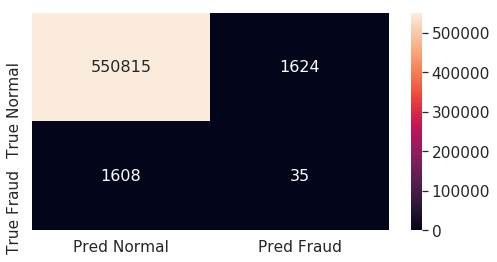

In [126]:
model_evaluate(ifo5,X5_val,y_val5)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  15.506944179534912
accuracy :  0.9943474070624926
sensitivity :  0.02251978088861838
specifity :  0.9972377040723048
precision :  0.023672424824056303
recall :  0.02251978088861838
f1 score :  0.023081721771678103
Confusion matrix
TP =  37 FP =  1526 FN =  1606 TN =  550913


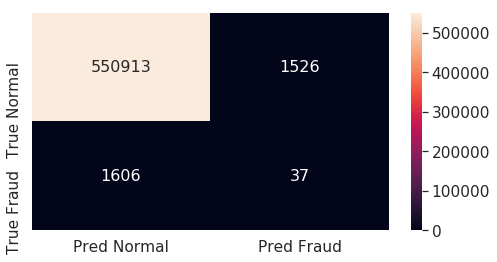

In [127]:
model_evaluate(ifo5, X5_test, y_test5)